In [210]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs


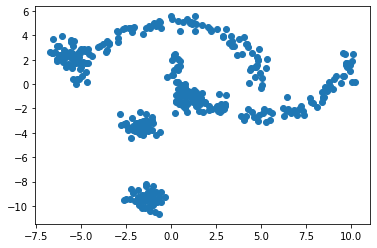

In [260]:
X, y = make_blobs(n_samples=200, centers=4, n_features=2, random_state=2, cluster_std=0.5)
X_moons, y = make_moons(n_samples = 200, noise=0.07)
X = X
X_moons = X_moons * 5
combined = np.concatenate((X, X_moons))
X = combined
plt.scatter(X[:, 0], X[:, 1])

We have 5 clusters: {0, 1, 2, 3, 8}
[1]


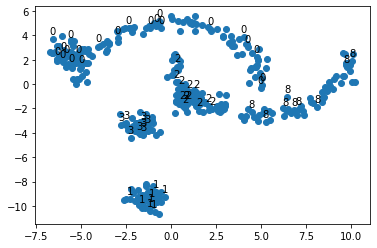

In [271]:
def assign_cluster_at_indices(cluster_array, indices, cluster_value):
    cluster_array[indices] = cluster_value

def get_all_indices_with_cluster_value(cluster_array, cluster_value):
    return np.where(cluster_array == cluster_value)[0]
    
def get_all_indices_with_cluster_values(cluster_array, cluster_values):
    indices = []
    for value in cluster_values:
        indices.append(get_all_indices_with_cluster_value(cluster_array, value))
    return [val for sublist in indices for val in sublist] # flatten the list of lists

def get_clusters_at_indices(cluster_array, indices):
    clusters = []
    for idx in indices:
        cluster = cluster_array[idx]
        if cluster != None:
            clusters.append(cluster)
    return set(clusters)

def get_samples_with_no_clusters_at_indices(cluster_array, indices):
    clusterless_samples = []
    for idx in indices:
        if cluster_array[idx] == None:
            clusterless_samples.append(idx)
    return clusterless_samples
    
assigned_clusters = np.array([None] * len(X))
epsilon_0 = 0.8
epsilon_1 = 0.9
cluster_idx = 0
sample_idx = 0
for sample in X:
    feat_0_arr = np.full((1, len(X)), sample[0])
    feat_1_ar = np.full((1,len(X)), sample[1])
    # You can generalize to n dimensions by simply iterating
    # over each axis and finding neighbors along that axis (ie for each feature)
    # then performing a logical AND the way we did.
    neighbors_along_0 = np.isclose(X[:, 0], feat_0_arr, 0, epsilon_0) 
    neighbors_along_1 = np.isclose(X[:, 1], feat_1_ar, 0, epsilon_1)
    neighbors = np.logical_and(neighbors_along_0, neighbors_along_1)
    indices = neighbors[0].nonzero()[0]
    nearby_clusters = get_clusters_at_indices(assigned_clusters, indices)
    sample_cluster = None
    if len(nearby_clusters) == 0:
        sample_cluster = cluster_idx
        cluster_idx += 1
        assign_cluster_at_indices(assigned_clusters, indices, sample_cluster)
    else:
        # clusterless samples are samples that have yet to be assigned a cluster (they were anomalies until now)
        clusterless_samples = get_samples_with_no_clusters_at_indices(assigned_clusters, indices)
        # clusters to reconcile are clusters that were previously 2 separate clusters but need to be merged given
        # the new elements under consideration (these elements "connect" the 2 separate clusters)
        clusters_to_reconcile = get_all_indices_with_cluster_values(assigned_clusters, nearby_clusters)
        min_cluster = min(nearby_clusters)
        sample_cluster = min_cluster
        assign_cluster_at_indices(assigned_clusters, clusters_to_reconcile + clusterless_samples, sample_cluster)
    sample_idx += 1
    


plt.scatter(X[:, 0], X[:, 1])
unique_clusters = set(assigned_clusters)          
plotted_labels = {} # dictionary of labels to how many times we drew them on the figure. Simply aesthetic.
idx = 0
for x in X:
    label = assigned_clusters[idx]
    if label in plotted_labels:
        plotted_labels[label] = plotted_labels[label] + 1
        if plotted_labels[label] % 7 != 0: # add label one in 7 times to not clutter the plot
            label = ''
    else:
        plotted_labels[label] = 1
    idx += 1
    plt.annotate(label,
                 (x[0],x[1]),
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')
    
# A cluster with a single point would be an anomaly
print("We have {} clusters: {}".format(len(unique_clusters), unique_clusters))